---
<div align="center">

# Particle Swarm Optimization with Pyswarms
</div>

---

In [81]:
%load_ext autoreload
%autoreload 2

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps
from pyswarms.single import (GlobalBestPSO)
from pyswarms.utils.functions.single_obj import (sphere, rastrigin, rosenbrock)
from pyswarms.utils.plotters import (plot_contour, plot_surface, plot_cost_history)
from pyswarms.utils.plotters.formatters import (Designer, Mesher)
from IPython.display import (display, Markdown)

---
<div align="center">

## Utility Functions
</div>

---

In [67]:
def displayParticlesSearch(config:dict) -> None:
    """
    # Description
        -> This function allows to plot the saved results (.gif file) using a markdown syntax
    := param: config - Configuration used to create, develop and save the results
    := return: None, since the function merely focuses on displaying the results
    """
    # Declare a markdown command line
    markdownCommand = f"""<div align=\"center\">
                            <img src=\"./{config['folder_results']}/{config['filename_result']}.gif\" width="40%"/>
                          </div>
                       """
    
    # Display the markdown 
    display(Markdown(markdownCommand))

In [105]:
def displayCostHistory(optimizer:GlobalBestPSO, length:int, width:int) -> None:
    """
    # Description
        -> The displayCostHistory function allows to visualize the cost associated with the particles movement cost throughout all the iterations performed
    := param: optimizer - Optimizer used
    := param: length - Length of the Plot
    := param: width - Width of the Plot
    := return: None, since we are only plotting data
    """
    # Plot the cost over Iterations Axes
    costHistoryAxes = plot_cost_history(cost_history = optimizer.cost_history)
    
    # Fetch the Figure associated with the Axes
    costFigure = costHistoryAxes.get_figure()
    
    # Resize the cost figure
    costFigure.set_size_inches(7, 5)
    
    # Show the Final graph
    plt.show()

---
<div align="center">

## Sphere Function
</div>

---

In [51]:
# Define the parameters used in PSO within a config dictionary
sphereConfig = {'d':2,
          'w':0.5,
          'c1':1.5,
          'c2':0.8,
          'n_particles':20,
          'n_iterations':300,
          'save_results':False,
          'folder_results':'Particle Searches',
          'filename_result':'SphereParticlesSearch'
         }

# Define the bounds for the experiment
lim = ([-5.12, -5.12], [5.12, 5.12])

In [52]:
# Create a new instance of a Optimizer
sphereOptimizer = ps.single.GlobalBestPSO(n_particles=config['n_particles'], dimensions=sphereConfig['d'], options=sphereConfig, bounds=lim)

# Perform Optimization
cost, pos = sphereOptimizer.optimize(sphere, iters=sphereConfig['n_iterations'])

2024-09-17 23:09:42,704 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300, 'save_results': False, 'folder_results': 'Particle Searches', 'filename_result': 'SphereParticlesSearch'}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|300/300, best_cost=5.26e-82
2024-09-17 23:09:43,355 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.26257013489354e-82, best pos: [-2.28464295e-41  2.07308303e-42]


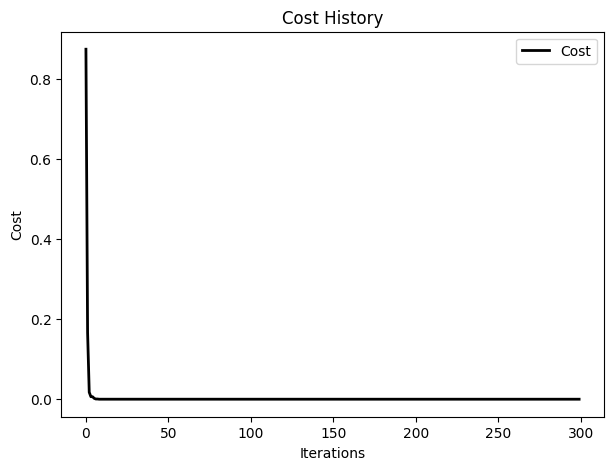

In [107]:
# PLot the Cost History
displayCostHistory(sphereOptimizer, 7, 5)

In [55]:
# Create a Mesher
m = Mesher(func=sphere,
           limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=sphereOptimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
if sphereConfig['save_results']:
    animation.save(f"./{sphereConfig['folder_results']}/{sphereConfig['filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

In [82]:
# Display the Algorithm Search approach
displayParticlesSearch(sphereConfig)

<div align="center">
                            <img src="./Particle Searches/SphereParticlesSearch.gif" width="40%"/>
                          </div>
                       

---
<div align="center">

## Rastrigin Function
</div>

---

In [76]:
# Define the parameters used in PSO within a config dictionary
rastriginConfig = {'d':2,
          'w':0.5,
          'c1':1.5,
          'c2':0.8,
          'n_particles':20,
          'n_iterations':300,
          'save_results':False,
          'folder_results':'Particle Searches',
          'filename_result':'RastriginParticlesSearch'
         }

# Define the bounds for the experiment
lim = ([-5.12, -5.12], [5.12, 5.12])

In [77]:
# Create a new instance of a Optimizer
rastriginOptimizer = ps.single.GlobalBestPSO(n_particles=rastriginConfig['n_particles'], dimensions=rastriginConfig['d'], options=rastriginConfig, bounds=lim)

# Perform Optimization
cost, pos = rastriginOptimizer.optimize(rastrigin, iters=rastriginConfig['n_iterations'])

2024-09-17 23:21:13,226 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300, 'save_results': False, 'folder_results': 'Particle Searches', 'filename_result': 'RastriginParticlesSearch'}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|300/300, best_cost=0
2024-09-17 23:21:13,850 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [-2.49750648e-09 -1.57369173e-09]


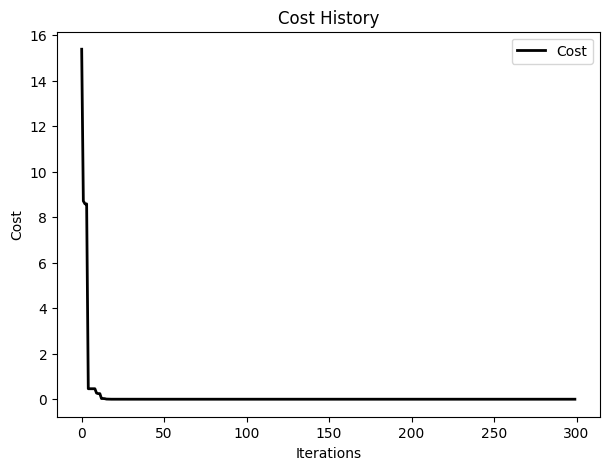

In [108]:
# PLot the Cost History
displayCostHistory(rastriginOptimizer, 7, 5)

In [79]:
# Create a Mesher
m = Mesher(func=rastrigin,
           limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=rastriginOptimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
if rastriginConfig['save_results']:
    animation.save(f"./{rastriginConfig['folder_results']}/{rastriginConfig['filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

In [80]:
# Display the Algorithm Search approach
displayParticlesSearch(rastriginConfig)

<div align="center">
                            <img src="./Particle Searches/RastriginParticlesSearch.gif" width="40%"/>
                          </div>
                       

---
<div align="center">

## Rosenbrock Function
</div>

---

In [62]:
# Define the parameters used in PSO within a config dictionary
rosenbrockConfig = {'d':2,
          'w':0.5,
          'c1':1.5,
          'c2':0.8,
          'n_particles':20,
          'n_iterations':300,
          'save_results':False,
          'folder_results':'Particle Searches',
          'filename_result':'RosenbrockParticlesSearch'
         }

# Define the bounds for the experiment
lim = ([-5.12, -5.12], [5.12, 5.12])

In [63]:
# Create a new instance of a Optimizer
rosenbrockOptimizer = ps.single.GlobalBestPSO(n_particles=rosenbrockConfig['n_particles'], dimensions=rosenbrockConfig['d'], options=rosenbrockConfig, bounds=lim)

# Perform Optimization
cost, pos = rosenbrockOptimizer.optimize(rosenbrock, iters=rosenbrockConfig['n_iterations'])

2024-09-17 23:11:37,766 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300, 'save_results': False, 'folder_results': 'Particle Searches', 'filename_result': 'RosenbrockParticlesSearch'}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|300/300, best_cost=7.83e-16
2024-09-17 23:11:38,320 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.8282876933096585e-16, best pos: [1.00000003 1.00000006]


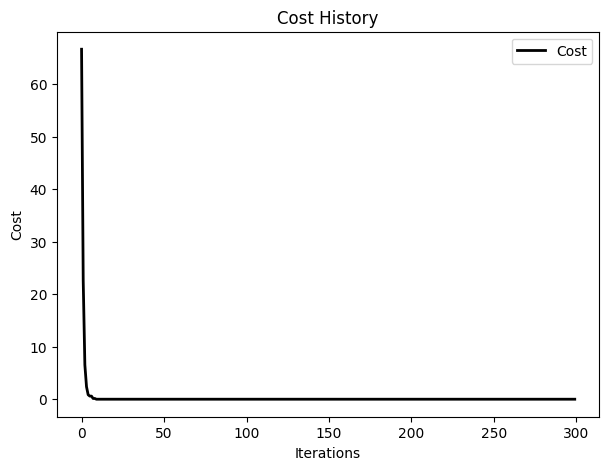

In [109]:
# PLot the Cost History
displayCostHistory(rosenbrockOptimizer, 7, 5)

In [65]:
# Create a Mesher
m = Mesher(func=rosenbrock,
           limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=rosenbrockOptimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
if rosenbrockConfig['save_results']:
    animation.save(f"./{rosenbrockConfig['folder_results']}/{rosenbrockConfig['filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

In [83]:
# Display the Algorithm Search approach
displayParticlesSearch(rosenbrockConfig)

<div align="center">
                            <img src="./Particle Searches/RosenbrockParticlesSearch.gif" width="40%"/>
                          </div>
                       

---